In [1]:
# Plotting Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Metrics for Classification technique
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# Scaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  RandomizedSearchCV, train_test_split

from xgboost import XGBClassifier
# !pip install catboost
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
file = open("col_description.txt")
lines = file.readlines()
print("col Description: \n")
for line in lines:
    print(line)

col Description: 

age

sex

chest pain type (4 values)

resting blood pressure

serum cholestoral in mg/dl

fasting blood sugar > 120 mg/dl

resting electrocardiographic results (values 0,1,2)

maximum heart rate achieved

exercise induced angina

oldpeak = ST depression induced by exercise relative to rest

the slope of the peak exercise ST segment

number of major vessels (0-3) colored by flourosopy

thal: 0 = normal; 1 = fixed defect; 2 = reversable defect



In [3]:
# Loading Data:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.shape

(1025, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
# Checking for null values 
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


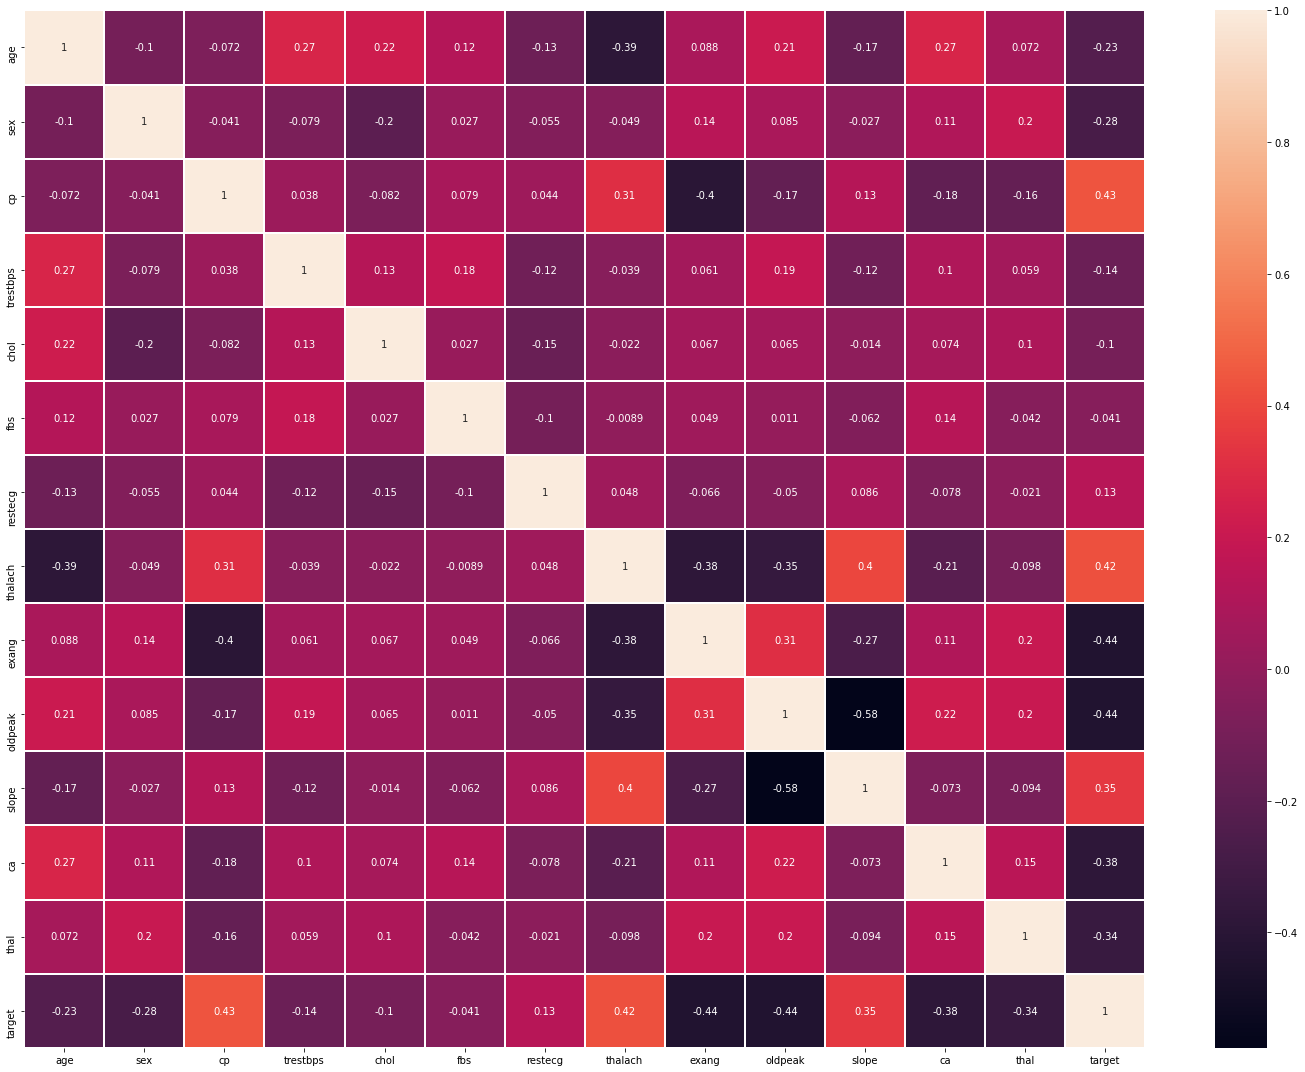

In [8]:
# plotting correlation heatmap the given data 
corr = data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True,linewidth=2)
plt.tight_layout()


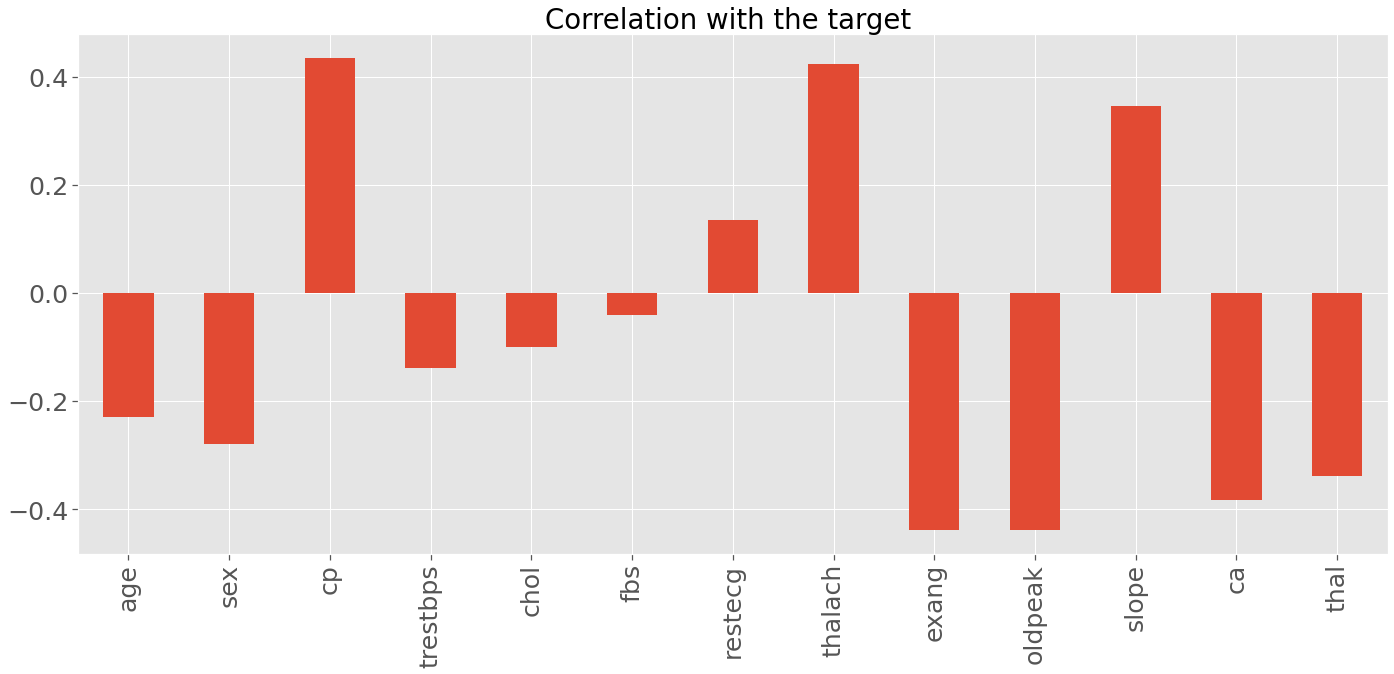

In [12]:
# checking correlation of different variables with target variables
sns.set_context('notebook',font_scale = 2.3)
data.drop('target', axis=1).corrwith(data.target).plot(kind='bar', grid=True, figsize=(20, 10),title="Correlation with the target ")
plt.tight_layout()

## Age Analysis


In [17]:
[data['age'].value_counts()]

[58    68
 57    57
 54    53
 59    46
 52    43
 56    39
 51    39
 62    37
 60    37
 44    36
 64    34
 41    32
 63    32
 61    31
 67    31
 55    30
 65    27
 53    26
 43    26
 42    26
 66    25
 45    25
 48    23
 46    23
 50    21
 47    18
 49    17
 35    15
 39    14
 70    14
 38    12
 68    12
 40    11
 71    11
 69     9
 37     6
 34     6
 29     4
 74     3
 76     3
 77     3
 Name: age, dtype: int64]

Text(0.5, 1.0, 'Age Analysis')

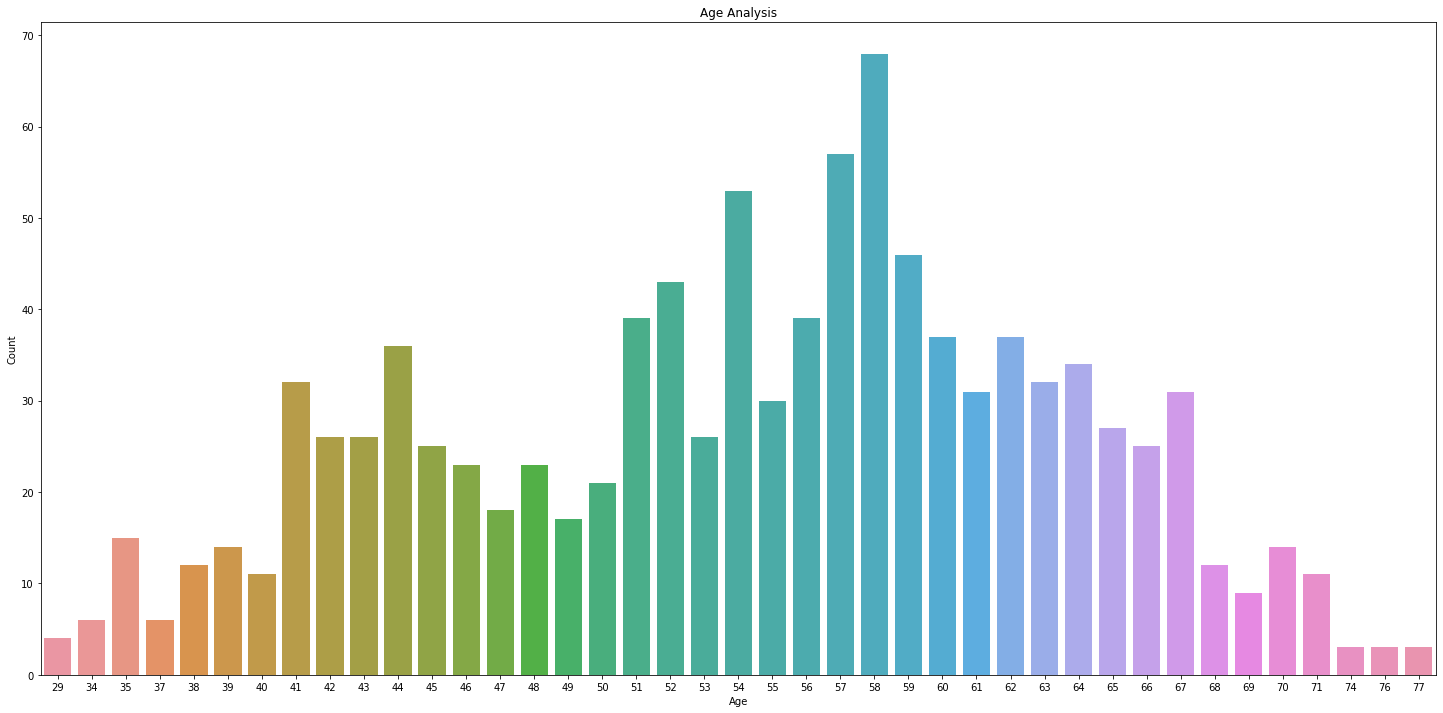

In [20]:
plt.figure(figsize=(25,12))
sns.barplot(x=data.age.value_counts().index,y=data.age.value_counts().values)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Analysis')

In [23]:
# range of ages:

print(f'min Age: {data.age.min()}')
print(f'max Age: {data.age.max()}')
print(f'Average Age: {data.age.mean()}')
print(f'Median Age: {data.age.median()}')


min Age: 29
max Age: 77
Average Age: 54.43414634146342
Median Age: 56.0


## Gender Feature Analysis 

C:\Users\rachi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

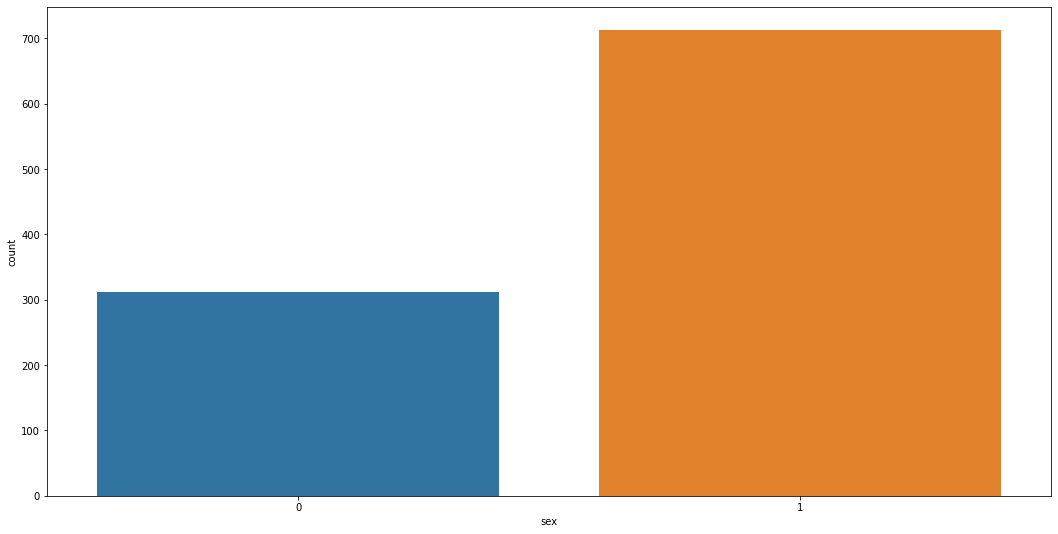

In [25]:
plt.figure(figsize=(18,9))
sns.countplot(data['sex'])

## Chest pain Type Feature Analysis

C:\Users\rachi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cp', ylabel='count'>

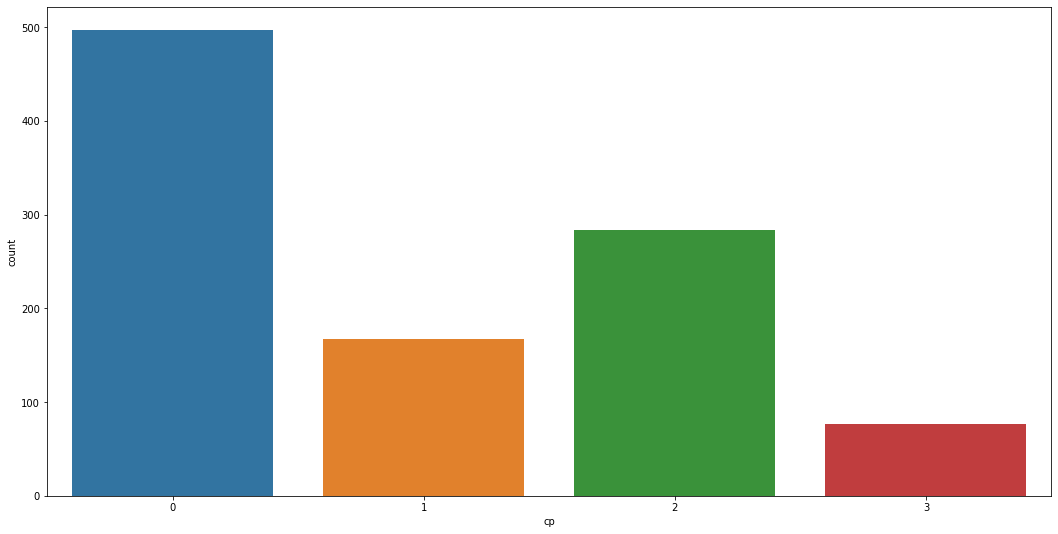

In [27]:
plt.figure(figsize=(18,9))
sns.countplot(data['cp'])

C:\Users\rachi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cp', ylabel='count'>

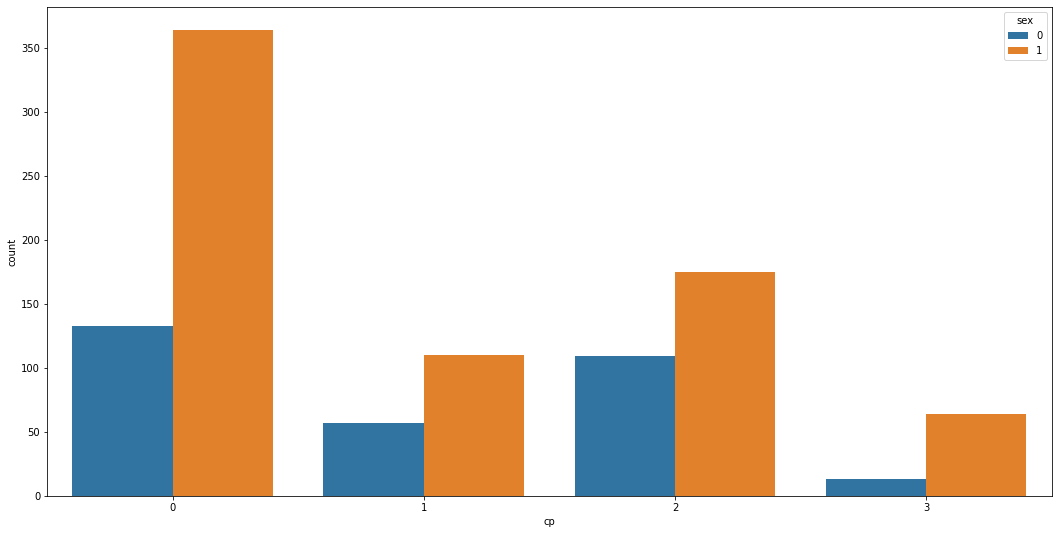

In [28]:
plt.figure(figsize=(18,9))
sns.countplot(data.cp,hue=data.sex)

## Feature Engineering 

In [33]:
# Getting unique values from each feature 
cat_val = []
cont_val=[]
for c in data.columns:
    print("---------------")
    print(f'{c} : {data[c].unique()}')
    if len(data[c].unique()) <= 10:
      cat_val.append(c)
    else:
        cont_val.append(c)

---------------
age : [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
---------------
sex : [1 0]
---------------
cp : [0 1 2 3]
---------------
trestbps : [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
---------------
chol : [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216

In [ ]:
cat_val.remove('target')
dfs = pd.get_dummies(data,columns = cat_val)

In [36]:
dfs.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [38]:
scaler = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dfs[col_to_scale] = scaler.fit_transform(dfs[col_to_scale])

In [40]:
#scaled data
dfs.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,0.834359,0.364875,0.930822,-1.874977,0.705408,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [42]:
# model Creation

X = dfs.drop('target',axis=1)
y = dfs.target

In [43]:
# Splitting the dataset 

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [44]:
x_train.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
1020,0.503520,0.479107,-0.484803,0.647366,-0.912329,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
479,0.393241,-0.206287,-0.581764,-0.787760,0.960840,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1
227,-1.150673,-0.777449,-0.077568,-0.004964,-0.656897,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
910,-0.488996,0.479107,-0.252098,0.603877,-0.401465,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
362,-1.260953,-0.548984,-0.639940,0.690855,-0.742041,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [45]:
y_train

1020    1
479     0
227     1
910     0
362     1
       ..
700     1
71      0
106     0
270     1
860     0
Name: target, Length: 717, dtype: int64

## Model Selection

In [46]:
knn = KNeighborsClassifier(n_neighbors=10)

In [47]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [48]:
y_pred_knn = knn.predict(x_test)

In [49]:
print(f'Prediction Score knn : {accuracy_score(y_test,y_pred_knn)}')

Prediction Score knn : 0.827922077922078


### Random Forest Classifier

In [51]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred_rfc = rfc.predict(x_test)

In [53]:
print(f'Prediction Score rfc : {accuracy_score(y_test,y_pred_rfc)}')

Prediction Score rfc : 0.9805194805194806


In [54]:
## XGBoost
xgb = XGBClassifier(random_state = 42)
xgb.fit(x_train,y_train)
y_pred_xgb = xgb.predict(x_test)

C:\Users\rachi\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:53:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [55]:
print(f'Prediction Score xgb : {accuracy_score(y_test,y_pred_xgb)}')

Prediction Score xgb : 0.9805194805194806


## CatBoost 

In [56]:
cat = CatBoostClassifier(random_state=42)


In [57]:
cat.fit(x_train,y_train)
cat.predict(x_test)

Learning rate set to 0.008938
0:	learn: 0.6830783	total: 148ms	remaining: 2m 27s
1:	learn: 0.6747900	total: 151ms	remaining: 1m 15s
2:	learn: 0.6669779	total: 153ms	remaining: 50.8s
3:	learn: 0.6574535	total: 155ms	remaining: 38.5s
4:	learn: 0.6487004	total: 158ms	remaining: 31.5s
5:	learn: 0.6408954	total: 178ms	remaining: 29.5s
6:	learn: 0.6323640	total: 185ms	remaining: 26.3s
7:	learn: 0.6251490	total: 189ms	remaining: 23.4s
8:	learn: 0.6188970	total: 192ms	remaining: 21.1s
9:	learn: 0.6114276	total: 194ms	remaining: 19.2s
10:	learn: 0.6046167	total: 196ms	remaining: 17.6s
11:	learn: 0.5967804	total: 198ms	remaining: 16.3s
12:	learn: 0.5898082	total: 200ms	remaining: 15.2s
13:	learn: 0.5830019	total: 203ms	remaining: 14.3s
14:	learn: 0.5763722	total: 206ms	remaining: 13.5s
15:	learn: 0.5693971	total: 209ms	remaining: 12.9s
16:	learn: 0.5625686	total: 219ms	remaining: 12.6s
17:	learn: 0.5549160	total: 221ms	remaining: 12.1s
18:	learn: 0.5486331	total: 226ms	remaining: 11.7s
19:	learn

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,

In [58]:
y_pred_xgb = xgb.predict(x_test)
print(f'Prediction Score xgb : {accuracy_score(y_test,y_pred_xgb)}')

Prediction Score xgb : 0.9805194805194806
